In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
import torchvision
import torch.utils.data as data_utils
import numpy as np
import os

torch.manual_seed(1)

In [2]:
dataset_image_channels = 3

class Discriminator(nn.Module):
    def __init__(self, in_dim, hidden_dim):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(dataset_image_channels, 16, 4, 2, 1, bias=False)
        self.norm1 = nn.BatchNorm2d(16)
        self.relu1 = nn.LeakyReLU(0.2, inplace=True)

        # 16 x 14 x 14
        self.conv2 = nn.Conv2d(16, 32, 7, 2, 0, bias=False)
        self.norm2 = nn.BatchNorm2d(32)
        self.relu2 = nn.LeakyReLU(0.2, inplace=True)


        # 32 x 4 x 4
        self.conv3 = nn.Conv2d(32, 1, 4, 2, 0, bias=False)
        self.sigmoid = nn.Sigmoid()

        # Linear
        self.flatten = nn.Flatten()
        self.out = nn.Linear(32*4*4, 1)


    def forward(self, x):
        #print("Forward pass")
        #print(x.shape)
        x = self.conv1(x)
        x = self.norm1(x)
        x = self.relu1(x)

        #print(x.shape)
        x = self.conv2(x)
        x = self.norm2(x)
        x = self.relu2(x)
        # print(f'conv shape {x.shape}')
        #print(x.shape)

        # x = self.conv3(x)
        # print(f'conv shape {x.shape}')
        x = self.flatten(x)
        # print(f'flat shape {x.shape}')

        return self.sigmoid(self.out(x))


kernel_size = 5  # <-- Kernel size
conv_stride = 1  # <-- Stride
conv_pad = 2  # <-- Padding
n_z = 20
ngf = 64
class Generator(nn.Module):
    def __init__(self, n_z, ngf, ndf):
        super(Generator, self).__init__()

        self.network = nn.Sequential(
            # in: n_z

            nn.ConvTranspose2d(n_z, ngf * 2, 7, 1, 0, bias=False),
            # out: (ngf*2) x 7 x 7
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 2, ngf * 1, 4, 2, 1, bias=False),
            # out: (ngf) x 14 x 14
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf, dataset_image_channels, 4, 2, 1),
            # out: 1 x 28 x 28
            nn.BatchNorm2d(dataset_image_channels),
            nn.ReLU(True),
        )

    def forward(self, x):
        return self.network(x)


model_G = Generator(n_z, ngf, 28 * 28)
model_D = Discriminator(28 * 28, 256)

In [3]:
'''optimizer_G = optim.RMSprop(model_G.parameters(), lr=0.002)
optimizer_D = optim.RMSprop(model_D.parameters(), lr=0.002)'''
# Use the Adam optimizer for the generator
# Before: 0.005 and 0.001

optimizer_G = torch.optim.RMSprop(model_G.parameters(), lr=0.005)

# Use the RMSprop optimizer for the discriminator
optimizer_D = torch.optim.RMSprop(model_D.parameters(), lr=0.001)

criterion = nn.BCELoss()



In [4]:
batch_size = 8

training_data = torchvision.datasets.CIFAR10(
    root="CIFAR10/",
    train=True,
    download=True,
    transform= torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                               torchvision.transforms.Resize((28, 28))
                                               ])

)
data_loader = torch.utils.data.DataLoader(training_data, batch_size)

Files already downloaded and verified


Loss G: tensor(-0.0277, grad_fn=<NegBackward0>) Loss D: tensor(1.4663, grad_fn=<AddBackward0>)


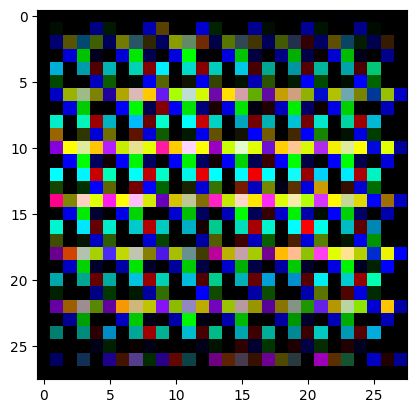

[1/3][0/50000]	Loss_D: 1.4663	Loss_G: -0.0277
[1/3][800/50000]	Loss_D: 0.1446	Loss_G: -0.0243
[1/3][1600/50000]	Loss_D: 0.1145	Loss_G: -0.0041
[1/3][2400/50000]	Loss_D: 0.0700	Loss_G: -0.0055
[1/3][3200/50000]	Loss_D: 0.0091	Loss_G: -0.0002
Loss G: tensor(-0.0004, grad_fn=<NegBackward0>) Loss D: tensor(0.0058, grad_fn=<AddBackward0>)


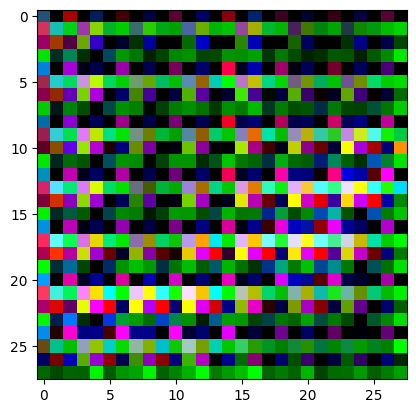

[1/3][4000/50000]	Loss_D: 0.0058	Loss_G: -0.0004
[1/3][4800/50000]	Loss_D: 0.0104	Loss_G: -0.0047
[1/3][5600/50000]	Loss_D: 0.0013	Loss_G: -0.0008
[1/3][6400/50000]	Loss_D: 0.0037	Loss_G: -0.0001
[1/3][7200/50000]	Loss_D: 0.0032	Loss_G: -0.0007
Loss G: tensor(-0.0011, grad_fn=<NegBackward0>) Loss D: tensor(0.0031, grad_fn=<AddBackward0>)


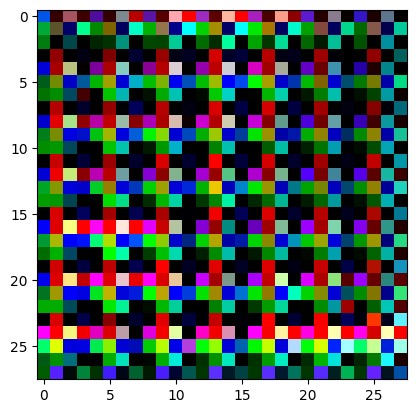

[1/3][8000/50000]	Loss_D: 0.0031	Loss_G: -0.0011
[1/3][8800/50000]	Loss_D: 0.0012	Loss_G: -0.0001
[1/3][9600/50000]	Loss_D: 0.0001	Loss_G: -0.0000
[1/3][10400/50000]	Loss_D: 0.0370	Loss_G: -0.0003
[1/3][11200/50000]	Loss_D: 0.0696	Loss_G: -0.0151
Loss G: tensor(-0.0077, grad_fn=<NegBackward0>) Loss D: tensor(0.0173, grad_fn=<AddBackward0>)


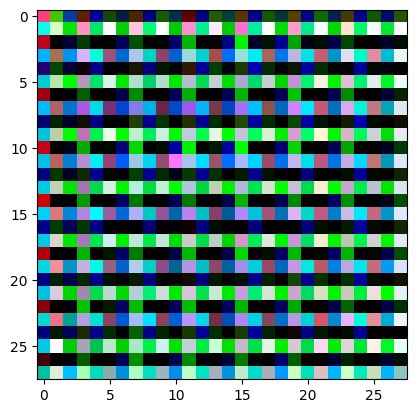

[1/3][12000/50000]	Loss_D: 0.0173	Loss_G: -0.0077
[1/3][12800/50000]	Loss_D: 0.0626	Loss_G: -0.0001
[1/3][13600/50000]	Loss_D: 0.1013	Loss_G: -0.0259
[1/3][14400/50000]	Loss_D: 1.9125	Loss_G: -0.5136
[1/3][15200/50000]	Loss_D: 2.1601	Loss_G: -0.8687
Loss G: tensor(-0.6920, grad_fn=<NegBackward0>) Loss D: tensor(1.6138, grad_fn=<AddBackward0>)


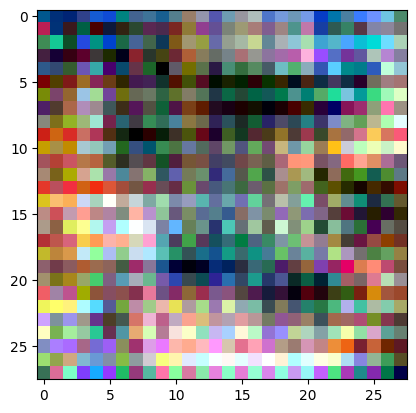

[1/3][16000/50000]	Loss_D: 1.6138	Loss_G: -0.6920
[1/3][16800/50000]	Loss_D: 1.4990	Loss_G: -0.7054
[1/3][17600/50000]	Loss_D: 1.5351	Loss_G: -0.6627
[1/3][18400/50000]	Loss_D: 1.4983	Loss_G: -0.6431
[1/3][19200/50000]	Loss_D: 1.4672	Loss_G: -0.6149
Loss G: tensor(-0.6606, grad_fn=<NegBackward0>) Loss D: tensor(1.4271, grad_fn=<AddBackward0>)


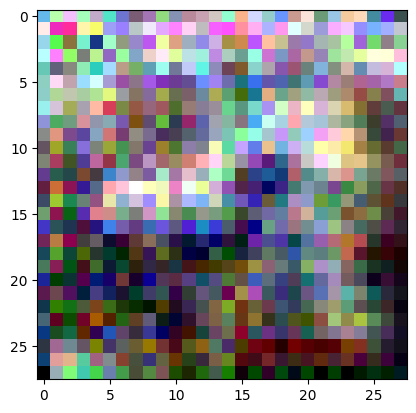

[1/3][20000/50000]	Loss_D: 1.4271	Loss_G: -0.6606
[1/3][20800/50000]	Loss_D: 1.4912	Loss_G: -0.6041
[1/3][21600/50000]	Loss_D: 1.4279	Loss_G: -0.7370
[1/3][22400/50000]	Loss_D: 1.3902	Loss_G: -0.6922
[1/3][23200/50000]	Loss_D: 1.4297	Loss_G: -0.6414
Loss G: tensor(-0.6442, grad_fn=<NegBackward0>) Loss D: tensor(1.3998, grad_fn=<AddBackward0>)


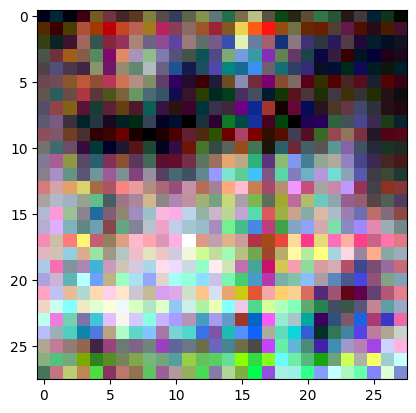

[1/3][24000/50000]	Loss_D: 1.3998	Loss_G: -0.6442
[1/3][24800/50000]	Loss_D: 1.4328	Loss_G: -0.6095
[1/3][25600/50000]	Loss_D: 1.3577	Loss_G: -0.5814
[1/3][26400/50000]	Loss_D: 1.3861	Loss_G: -0.6602
[1/3][27200/50000]	Loss_D: 1.3622	Loss_G: -0.6851
Loss G: tensor(-0.6607, grad_fn=<NegBackward0>) Loss D: tensor(1.3917, grad_fn=<AddBackward0>)


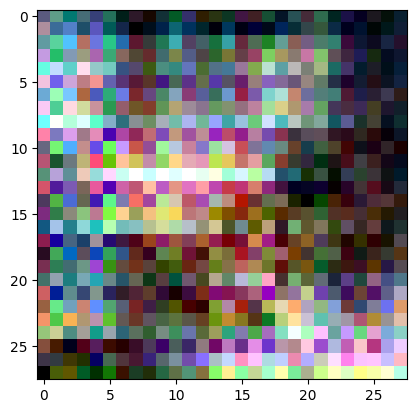

[1/3][28000/50000]	Loss_D: 1.3917	Loss_G: -0.6607
[1/3][28800/50000]	Loss_D: 1.4133	Loss_G: -0.5922
[1/3][29600/50000]	Loss_D: 1.4089	Loss_G: -0.6444
[1/3][30400/50000]	Loss_D: 1.3868	Loss_G: -0.6388
[1/3][31200/50000]	Loss_D: 1.4196	Loss_G: -0.7367
Loss G: tensor(-0.6712, grad_fn=<NegBackward0>) Loss D: tensor(1.4322, grad_fn=<AddBackward0>)


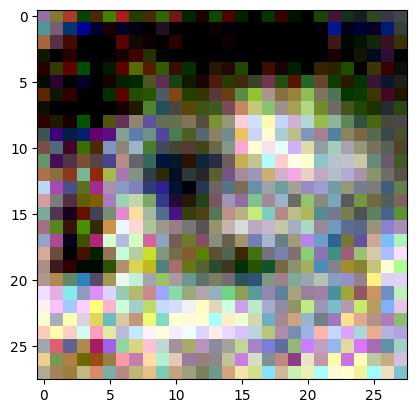

[1/3][32000/50000]	Loss_D: 1.4322	Loss_G: -0.6712
[1/3][32800/50000]	Loss_D: 1.3773	Loss_G: -0.5726
[1/3][33600/50000]	Loss_D: 1.3643	Loss_G: -0.6781
[1/3][34400/50000]	Loss_D: 1.4249	Loss_G: -0.7532
[1/3][35200/50000]	Loss_D: 1.3919	Loss_G: -0.6993
Loss G: tensor(-0.6352, grad_fn=<NegBackward0>) Loss D: tensor(1.3581, grad_fn=<AddBackward0>)


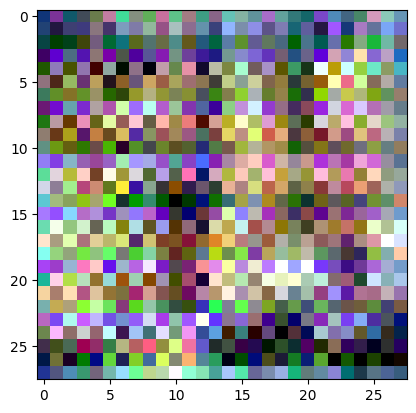

[1/3][36000/50000]	Loss_D: 1.3581	Loss_G: -0.6352
[1/3][36800/50000]	Loss_D: 1.4027	Loss_G: -0.7068
[1/3][37600/50000]	Loss_D: 1.3956	Loss_G: -0.6467
[1/3][38400/50000]	Loss_D: 1.3915	Loss_G: -0.6446
[1/3][39200/50000]	Loss_D: 1.3988	Loss_G: -0.6312
Loss G: tensor(-0.6299, grad_fn=<NegBackward0>) Loss D: tensor(1.3723, grad_fn=<AddBackward0>)


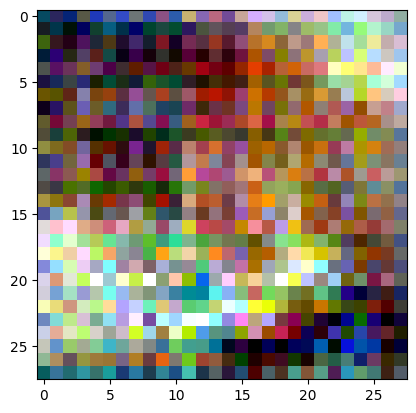

[1/3][40000/50000]	Loss_D: 1.3723	Loss_G: -0.6299
[1/3][40800/50000]	Loss_D: 1.4150	Loss_G: -0.6902
[1/3][41600/50000]	Loss_D: 1.3969	Loss_G: -0.6555
[1/3][42400/50000]	Loss_D: 1.4023	Loss_G: -0.7088
[1/3][43200/50000]	Loss_D: 1.4347	Loss_G: -0.6332
Loss G: tensor(-0.7457, grad_fn=<NegBackward0>) Loss D: tensor(1.4130, grad_fn=<AddBackward0>)


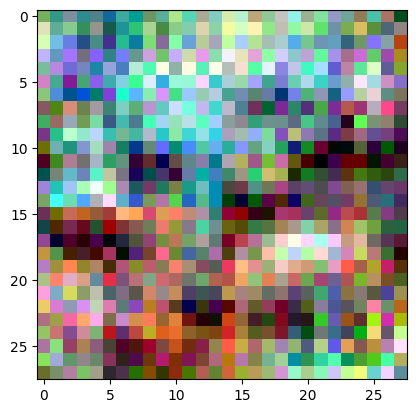

[1/3][44000/50000]	Loss_D: 1.4130	Loss_G: -0.7457
[1/3][44800/50000]	Loss_D: 1.4138	Loss_G: -0.6810
[1/3][45600/50000]	Loss_D: 1.3888	Loss_G: -0.6278
[1/3][46400/50000]	Loss_D: 1.3321	Loss_G: -0.6289
[1/3][47200/50000]	Loss_D: 1.4719	Loss_G: -0.6527
Loss G: tensor(-0.6294, grad_fn=<NegBackward0>) Loss D: tensor(1.4029, grad_fn=<AddBackward0>)


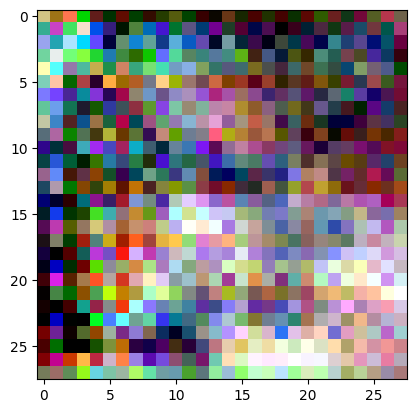

[1/3][48000/50000]	Loss_D: 1.4029	Loss_G: -0.6294
[1/3][48800/50000]	Loss_D: 1.4014	Loss_G: -0.6655
[1/3][49600/50000]	Loss_D: 1.4078	Loss_G: -0.6125
Loss G: tensor(-0.6251, grad_fn=<NegBackward0>) Loss D: tensor(1.4405, grad_fn=<AddBackward0>)


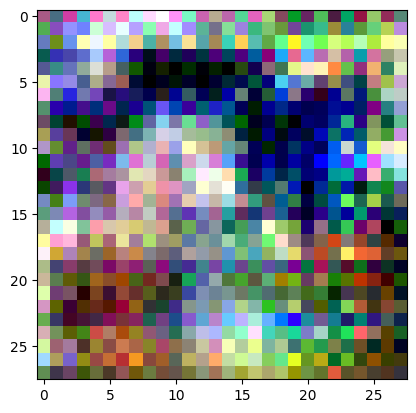

[2/3][0/50000]	Loss_D: 1.4405	Loss_G: -0.6251
[2/3][800/50000]	Loss_D: 1.4281	Loss_G: -0.6862
[2/3][1600/50000]	Loss_D: 1.3778	Loss_G: -0.6471
[2/3][2400/50000]	Loss_D: 1.4453	Loss_G: -0.7447
[2/3][3200/50000]	Loss_D: 1.4360	Loss_G: -0.6137
Loss G: tensor(-0.7078, grad_fn=<NegBackward0>) Loss D: tensor(1.3922, grad_fn=<AddBackward0>)


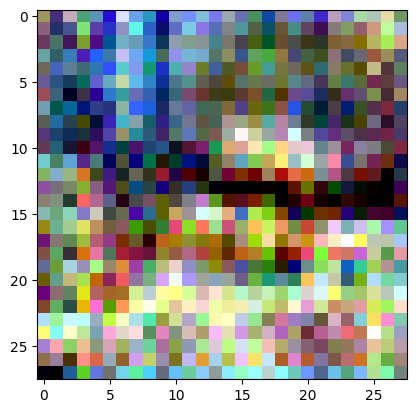

[2/3][4000/50000]	Loss_D: 1.3922	Loss_G: -0.7078
[2/3][4800/50000]	Loss_D: 1.3590	Loss_G: -0.6158
[2/3][5600/50000]	Loss_D: 1.4350	Loss_G: -0.7539
[2/3][6400/50000]	Loss_D: 1.3830	Loss_G: -0.6500
[2/3][7200/50000]	Loss_D: 1.4015	Loss_G: -0.6537
Loss G: tensor(-0.6690, grad_fn=<NegBackward0>) Loss D: tensor(1.4413, grad_fn=<AddBackward0>)


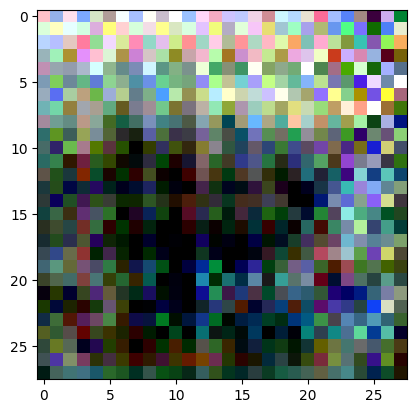

[2/3][8000/50000]	Loss_D: 1.4413	Loss_G: -0.6690
[2/3][8800/50000]	Loss_D: 1.4103	Loss_G: -0.7223
[2/3][9600/50000]	Loss_D: 1.3963	Loss_G: -0.6283
[2/3][10400/50000]	Loss_D: 1.3683	Loss_G: -0.6448
[2/3][11200/50000]	Loss_D: 1.3767	Loss_G: -0.7037
Loss G: tensor(-0.6513, grad_fn=<NegBackward0>) Loss D: tensor(1.4096, grad_fn=<AddBackward0>)


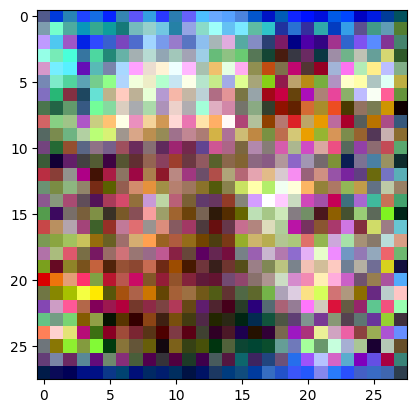

[2/3][12000/50000]	Loss_D: 1.4096	Loss_G: -0.6513
[2/3][12800/50000]	Loss_D: 1.4148	Loss_G: -0.6958
[2/3][13600/50000]	Loss_D: 1.3875	Loss_G: -0.6851
[2/3][14400/50000]	Loss_D: 1.3877	Loss_G: -0.7606
[2/3][15200/50000]	Loss_D: 1.4008	Loss_G: -0.6782
Loss G: tensor(-0.6171, grad_fn=<NegBackward0>) Loss D: tensor(1.3701, grad_fn=<AddBackward0>)


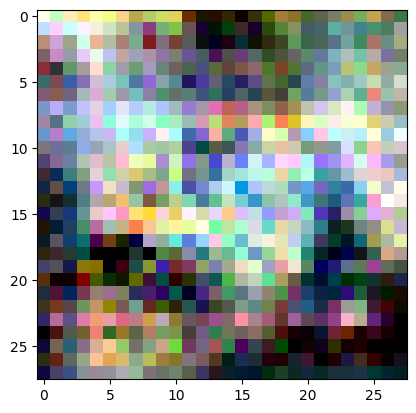

[2/3][16000/50000]	Loss_D: 1.3701	Loss_G: -0.6171
[2/3][16800/50000]	Loss_D: 1.3464	Loss_G: -0.6845
[2/3][17600/50000]	Loss_D: 1.4364	Loss_G: -0.7649
[2/3][18400/50000]	Loss_D: 1.3887	Loss_G: -0.6764
[2/3][19200/50000]	Loss_D: 1.4346	Loss_G: -0.7150
Loss G: tensor(-0.6437, grad_fn=<NegBackward0>) Loss D: tensor(1.3737, grad_fn=<AddBackward0>)


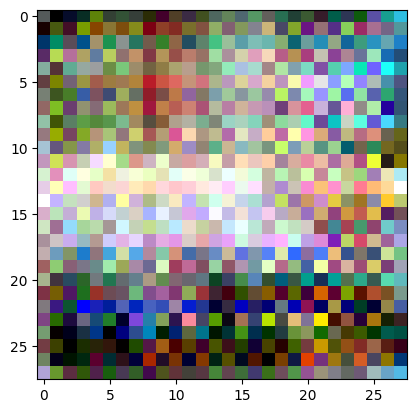

[2/3][20000/50000]	Loss_D: 1.3737	Loss_G: -0.6437
[2/3][20800/50000]	Loss_D: 1.4116	Loss_G: -0.6536
[2/3][21600/50000]	Loss_D: 1.4097	Loss_G: -0.7474
[2/3][22400/50000]	Loss_D: 1.4110	Loss_G: -0.6779
[2/3][23200/50000]	Loss_D: 1.3837	Loss_G: -0.6287
Loss G: tensor(-0.6870, grad_fn=<NegBackward0>) Loss D: tensor(1.3799, grad_fn=<AddBackward0>)


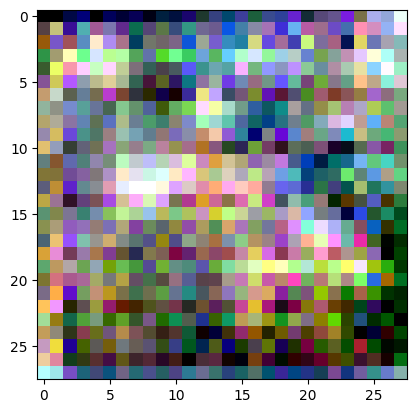

[2/3][24000/50000]	Loss_D: 1.3799	Loss_G: -0.6870
[2/3][24800/50000]	Loss_D: 1.3821	Loss_G: -0.6833
[2/3][25600/50000]	Loss_D: 1.3721	Loss_G: -0.6663
[2/3][26400/50000]	Loss_D: 1.4125	Loss_G: -0.6938
[2/3][27200/50000]	Loss_D: 1.3669	Loss_G: -0.6677
Loss G: tensor(-0.7088, grad_fn=<NegBackward0>) Loss D: tensor(1.4079, grad_fn=<AddBackward0>)


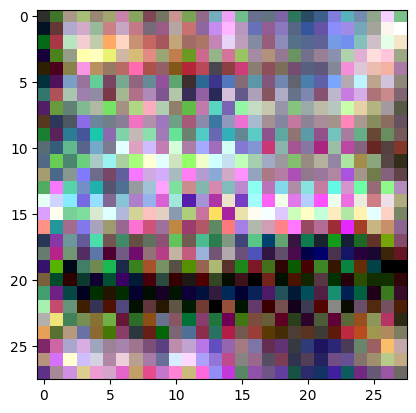

[2/3][28000/50000]	Loss_D: 1.4079	Loss_G: -0.7088
[2/3][28800/50000]	Loss_D: 1.3937	Loss_G: -0.6381
[2/3][29600/50000]	Loss_D: 1.3750	Loss_G: -0.6078
[2/3][30400/50000]	Loss_D: 1.4043	Loss_G: -0.7001
[2/3][31200/50000]	Loss_D: 1.3758	Loss_G: -0.6662
Loss G: tensor(-0.6887, grad_fn=<NegBackward0>) Loss D: tensor(1.3739, grad_fn=<AddBackward0>)


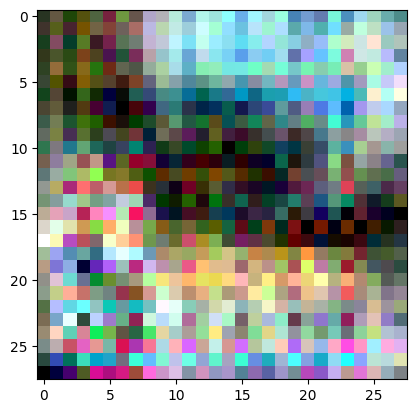

[2/3][32000/50000]	Loss_D: 1.3739	Loss_G: -0.6887
[2/3][32800/50000]	Loss_D: 1.3818	Loss_G: -0.6288
[2/3][33600/50000]	Loss_D: 1.4074	Loss_G: -0.6927
[2/3][34400/50000]	Loss_D: 1.4460	Loss_G: -0.7418
[2/3][35200/50000]	Loss_D: 1.3910	Loss_G: -0.6868
Loss G: tensor(-0.7020, grad_fn=<NegBackward0>) Loss D: tensor(1.4031, grad_fn=<AddBackward0>)


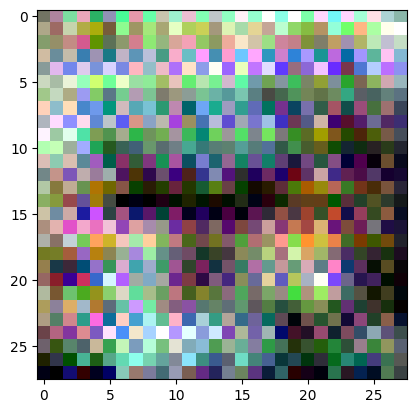

[2/3][36000/50000]	Loss_D: 1.4031	Loss_G: -0.7020
[2/3][36800/50000]	Loss_D: 1.3600	Loss_G: -0.6779
[2/3][37600/50000]	Loss_D: 1.3968	Loss_G: -0.7045
[2/3][38400/50000]	Loss_D: 1.3426	Loss_G: -0.6380
[2/3][39200/50000]	Loss_D: 1.3992	Loss_G: -0.6522
Loss G: tensor(-0.6328, grad_fn=<NegBackward0>) Loss D: tensor(1.3730, grad_fn=<AddBackward0>)


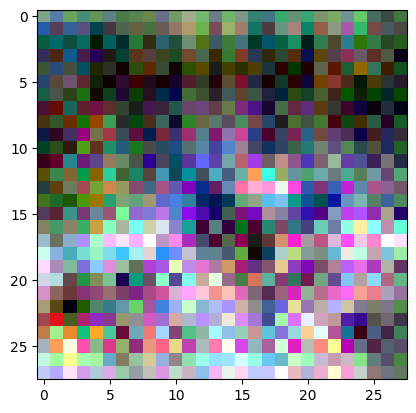

[2/3][40000/50000]	Loss_D: 1.3730	Loss_G: -0.6328
[2/3][40800/50000]	Loss_D: 1.3872	Loss_G: -0.6596
[2/3][41600/50000]	Loss_D: 1.4042	Loss_G: -0.6694
[2/3][42400/50000]	Loss_D: 1.3555	Loss_G: -0.6299
[2/3][43200/50000]	Loss_D: 1.3811	Loss_G: -0.6865
Loss G: tensor(-0.6758, grad_fn=<NegBackward0>) Loss D: tensor(1.3494, grad_fn=<AddBackward0>)


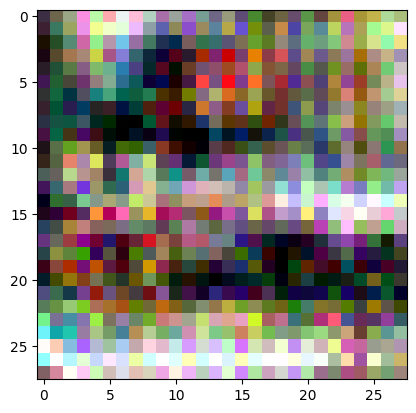

[2/3][44000/50000]	Loss_D: 1.3494	Loss_G: -0.6758
[2/3][44800/50000]	Loss_D: 1.3770	Loss_G: -0.6972
[2/3][45600/50000]	Loss_D: 1.3838	Loss_G: -0.6777
[2/3][46400/50000]	Loss_D: 1.3397	Loss_G: -0.6386
[2/3][47200/50000]	Loss_D: 1.4022	Loss_G: -0.7082
Loss G: tensor(-0.6636, grad_fn=<NegBackward0>) Loss D: tensor(1.3675, grad_fn=<AddBackward0>)


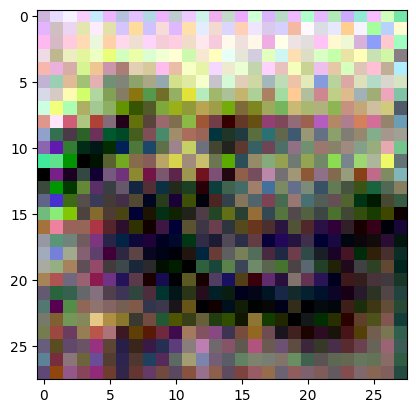

[2/3][48000/50000]	Loss_D: 1.3675	Loss_G: -0.6636
[2/3][48800/50000]	Loss_D: 1.4559	Loss_G: -0.7018
[2/3][49600/50000]	Loss_D: 1.4184	Loss_G: -0.6617
Loss G: tensor(-0.6705, grad_fn=<NegBackward0>) Loss D: tensor(1.3894, grad_fn=<AddBackward0>)


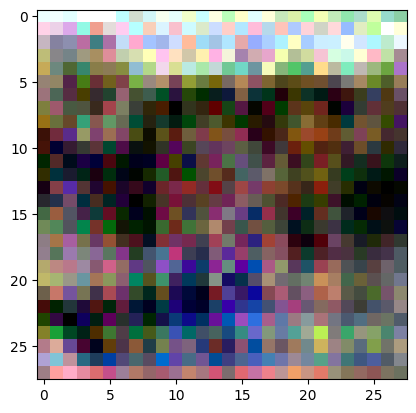

[3/3][0/50000]	Loss_D: 1.3894	Loss_G: -0.6705
[3/3][800/50000]	Loss_D: 1.3962	Loss_G: -0.6723
[3/3][1600/50000]	Loss_D: 1.4087	Loss_G: -0.6872
[3/3][2400/50000]	Loss_D: 1.3839	Loss_G: -0.6898
[3/3][3200/50000]	Loss_D: 1.3440	Loss_G: -0.6300
Loss G: tensor(-0.6809, grad_fn=<NegBackward0>) Loss D: tensor(1.4191, grad_fn=<AddBackward0>)


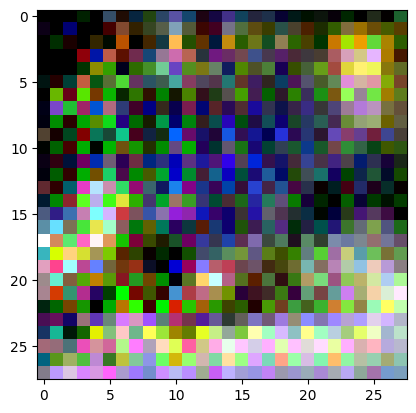

[3/3][4000/50000]	Loss_D: 1.4191	Loss_G: -0.6809
[3/3][4800/50000]	Loss_D: 1.4129	Loss_G: -0.6670
[3/3][5600/50000]	Loss_D: 1.3902	Loss_G: -0.6952
[3/3][6400/50000]	Loss_D: 1.4100	Loss_G: -0.7007
[3/3][7200/50000]	Loss_D: 1.3811	Loss_G: -0.6249
Loss G: tensor(-0.7199, grad_fn=<NegBackward0>) Loss D: tensor(1.4331, grad_fn=<AddBackward0>)


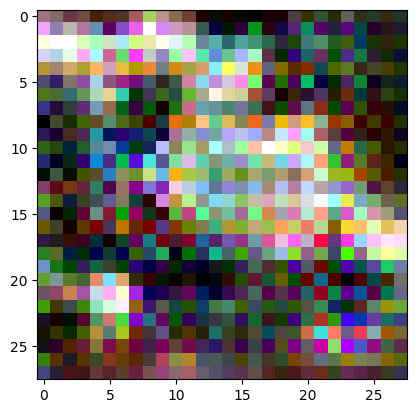

[3/3][8000/50000]	Loss_D: 1.4331	Loss_G: -0.7199
[3/3][8800/50000]	Loss_D: 1.3923	Loss_G: -0.6737
[3/3][9600/50000]	Loss_D: 1.3939	Loss_G: -0.6772
[3/3][10400/50000]	Loss_D: 1.3603	Loss_G: -0.6633
[3/3][11200/50000]	Loss_D: 1.3910	Loss_G: -0.6761
Loss G: tensor(-0.6708, grad_fn=<NegBackward0>) Loss D: tensor(1.4330, grad_fn=<AddBackward0>)


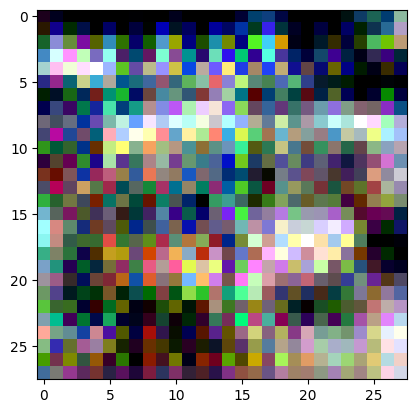

[3/3][12000/50000]	Loss_D: 1.4330	Loss_G: -0.6708
[3/3][12800/50000]	Loss_D: 1.3837	Loss_G: -0.6666
[3/3][13600/50000]	Loss_D: 1.3921	Loss_G: -0.6977
[3/3][14400/50000]	Loss_D: 1.3730	Loss_G: -0.6833
[3/3][15200/50000]	Loss_D: 1.3976	Loss_G: -0.6849
Loss G: tensor(-0.6617, grad_fn=<NegBackward0>) Loss D: tensor(1.3882, grad_fn=<AddBackward0>)


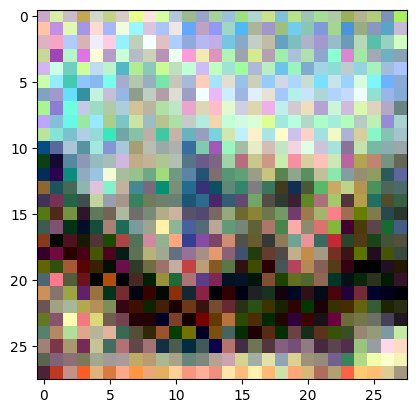

[3/3][16000/50000]	Loss_D: 1.3882	Loss_G: -0.6617
[3/3][16800/50000]	Loss_D: 1.3919	Loss_G: -0.6947
[3/3][17600/50000]	Loss_D: 1.4368	Loss_G: -0.7028
[3/3][18400/50000]	Loss_D: 1.3560	Loss_G: -0.6501
[3/3][19200/50000]	Loss_D: 1.3888	Loss_G: -0.6927
Loss G: tensor(-0.6785, grad_fn=<NegBackward0>) Loss D: tensor(1.4161, grad_fn=<AddBackward0>)


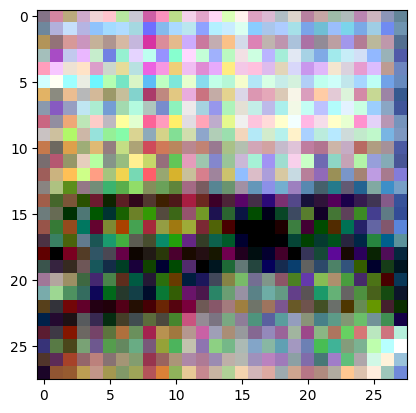

[3/3][20000/50000]	Loss_D: 1.4161	Loss_G: -0.6785
[3/3][20800/50000]	Loss_D: 1.3997	Loss_G: -0.6668
[3/3][21600/50000]	Loss_D: 1.3985	Loss_G: -0.7102
[3/3][22400/50000]	Loss_D: 1.3697	Loss_G: -0.6577
[3/3][23200/50000]	Loss_D: 1.4209	Loss_G: -0.6563
Loss G: tensor(-0.6950, grad_fn=<NegBackward0>) Loss D: tensor(1.4004, grad_fn=<AddBackward0>)


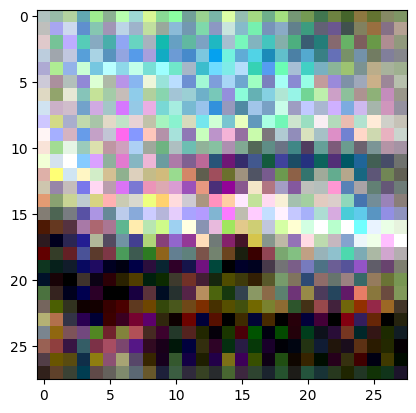

[3/3][24000/50000]	Loss_D: 1.4004	Loss_G: -0.6950
[3/3][24800/50000]	Loss_D: 1.3692	Loss_G: -0.6773
[3/3][25600/50000]	Loss_D: 1.3683	Loss_G: -0.6512
[3/3][26400/50000]	Loss_D: 1.3790	Loss_G: -0.6978
[3/3][27200/50000]	Loss_D: 1.3928	Loss_G: -0.6705
Loss G: tensor(-0.6906, grad_fn=<NegBackward0>) Loss D: tensor(1.3789, grad_fn=<AddBackward0>)


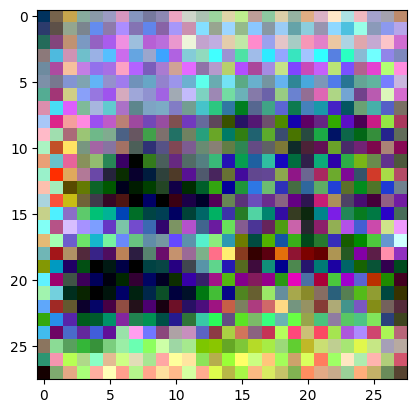

[3/3][28000/50000]	Loss_D: 1.3789	Loss_G: -0.6906
[3/3][28800/50000]	Loss_D: 1.3970	Loss_G: -0.6598
[3/3][29600/50000]	Loss_D: 1.4076	Loss_G: -0.6773
[3/3][30400/50000]	Loss_D: 1.3795	Loss_G: -0.6590
[3/3][31200/50000]	Loss_D: 1.3827	Loss_G: -0.6924
Loss G: tensor(-0.6871, grad_fn=<NegBackward0>) Loss D: tensor(1.4005, grad_fn=<AddBackward0>)


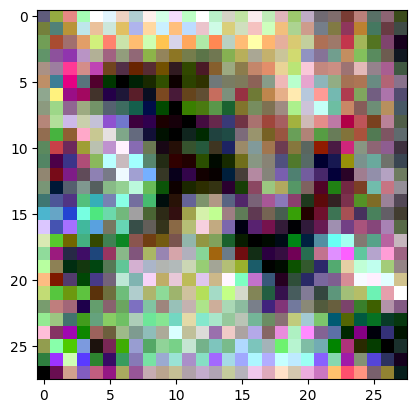

[3/3][32000/50000]	Loss_D: 1.4005	Loss_G: -0.6871
[3/3][32800/50000]	Loss_D: 1.4006	Loss_G: -0.6678
[3/3][33600/50000]	Loss_D: 1.3855	Loss_G: -0.6882
[3/3][34400/50000]	Loss_D: 1.3850	Loss_G: -0.7039
[3/3][35200/50000]	Loss_D: 1.3694	Loss_G: -0.6820
Loss G: tensor(-0.6902, grad_fn=<NegBackward0>) Loss D: tensor(1.4017, grad_fn=<AddBackward0>)


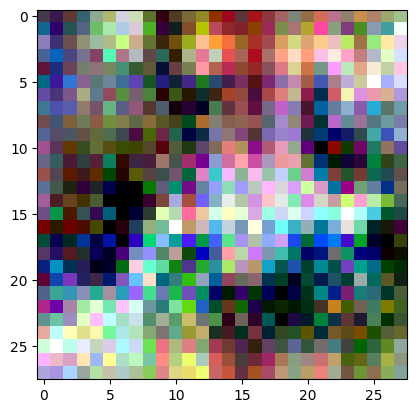

[3/3][36000/50000]	Loss_D: 1.4017	Loss_G: -0.6902
[3/3][36800/50000]	Loss_D: 1.3664	Loss_G: -0.6891
[3/3][37600/50000]	Loss_D: 1.3836	Loss_G: -0.7058
[3/3][38400/50000]	Loss_D: 1.4202	Loss_G: -0.7061
[3/3][39200/50000]	Loss_D: 1.3858	Loss_G: -0.6620
Loss G: tensor(-0.6834, grad_fn=<NegBackward0>) Loss D: tensor(1.4052, grad_fn=<AddBackward0>)


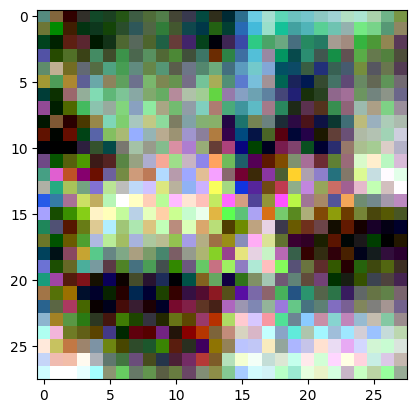

[3/3][40000/50000]	Loss_D: 1.4052	Loss_G: -0.6834
[3/3][40800/50000]	Loss_D: 1.3912	Loss_G: -0.6813
[3/3][41600/50000]	Loss_D: 1.4113	Loss_G: -0.6790
[3/3][42400/50000]	Loss_D: 1.4063	Loss_G: -0.6781
[3/3][43200/50000]	Loss_D: 1.3837	Loss_G: -0.6964
Loss G: tensor(-0.6704, grad_fn=<NegBackward0>) Loss D: tensor(1.3734, grad_fn=<AddBackward0>)


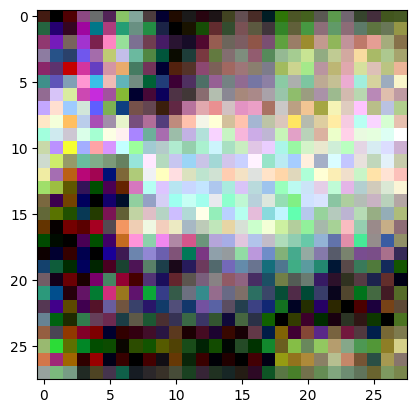

[3/3][44000/50000]	Loss_D: 1.3734	Loss_G: -0.6704
[3/3][44800/50000]	Loss_D: 1.3620	Loss_G: -0.6795
[3/3][45600/50000]	Loss_D: 1.3789	Loss_G: -0.6828
[3/3][46400/50000]	Loss_D: 1.3747	Loss_G: -0.6593
[3/3][47200/50000]	Loss_D: 1.3746	Loss_G: -0.6898
Loss G: tensor(-0.6767, grad_fn=<NegBackward0>) Loss D: tensor(1.3911, grad_fn=<AddBackward0>)


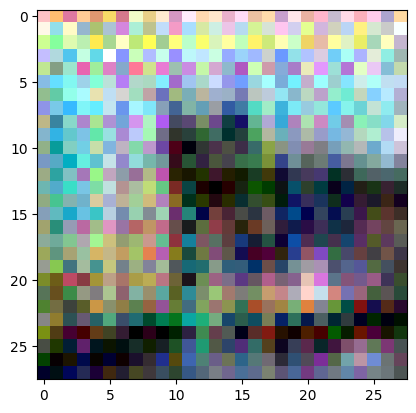

[3/3][48000/50000]	Loss_D: 1.3911	Loss_G: -0.6767
[3/3][48800/50000]	Loss_D: 1.4325	Loss_G: -0.7369
[3/3][49600/50000]	Loss_D: 1.3866	Loss_G: -0.6657


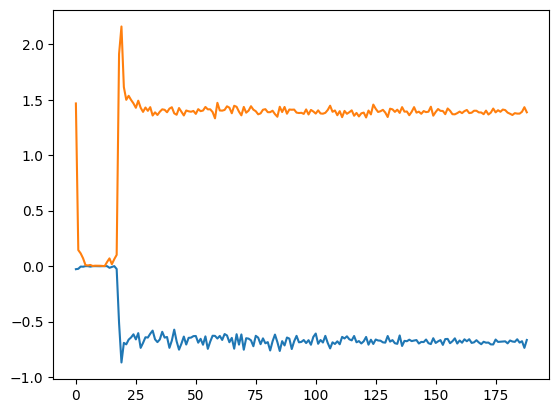

In [5]:
num_epochs = 3
real_label = 1
fake_label = 0

cum_data = {'d_loss': [], 'g_loss': [], 'fid_scores': [], 'generated_image': [], 'real_image': []}
for e in range(num_epochs):
    done = True

    for n, (real_samples, _) in enumerate(data_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn(batch_size, 20, 1, 1)

        # Zero gradients
        model_D.zero_grad()

        # Generate fake samples
        generated_samples = model_G(latent_space_samples)

        # TRAIN ON REAL SAMPLES
        # Real samples through Discriminator
        D_scores_on_real = model_D(real_samples).view(-1)

        # TRAIN ON FAKE SAMPLES
        D_scores_on_fake = model_D(generated_samples).view(-1)
        loss_d1 = criterion(D_scores_on_real, torch.ones(8))
        loss_d2 = criterion(D_scores_on_fake, torch.zeros(8))
        loss_d = loss_d1 + loss_d2
        loss_d.backward(retain_graph=True)
        optimizer_D.step()

        # Update G network
        model_G.zero_grad()
        D_scores_on_fake2 = model_D(generated_samples).view(-1)
        loss_g = -criterion(D_scores_on_fake2, torch.zeros(8))
        loss_g.backward(retain_graph=True)
        optimizer_G.step()


        if n % 500 == 0:
            # Bookkeeping
            done = False
            '''loss_g = - D_scores_on_fake.mean()
            loss_d = D_scores_on_real.mean() - D_scores_on_fake.mean()'''
            print("Loss G:", loss_g, "Loss D:", loss_d)

            #plt.imshow(generated_samples[0][0].detach(), cmap='Greys')
            latent_space_samples = torch.randn((batch_size, 20, 1, 1))
            generated_samples = model_G(latent_space_samples)
            generated_samples = generated_samples.detach()
            generated_samples = generated_samples.permute([0, 2, 3, 1])
            generated_samples -= generated_samples.min(1, keepdim=True)[0]
            generated_samples /= generated_samples.max(1, keepdim=True)[0]
            plt.imshow(generated_samples[0])
            plt.show()
        if n % 100 == 0:
            '''loss_g = - D_scores_on_fake.mean()
            loss_d = D_scores_on_real.mean() - D_scores_on_fake.mean()'''

            cum_data['g_loss'].append(loss_g.detach())
            cum_data['d_loss'].append(loss_d.detach())
            cum_data['generated_image'].append(generated_samples)
            cum_data['real_image'].append(real_samples)
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f'
                  % (e+1, num_epochs, n*batch_size, len(training_data),
                     loss_d, loss_g))


plt.plot(cum_data['g_loss'])
plt.plot(cum_data['d_loss'])
plt.show()

In [6]:
for i in range(len(cum_data['generated_image'])):
    cum_data['generated_image'][i] = cum_data['generated_image'][i].detach()

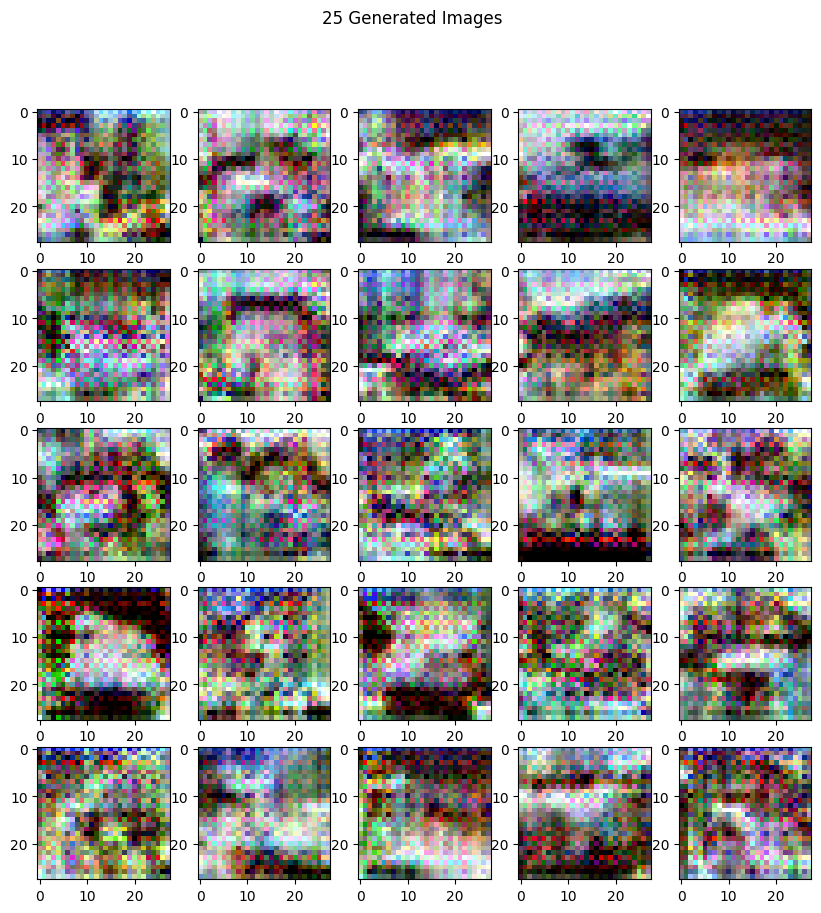

In [7]:
# Generate 25 Images

latent_space_samples = torch.randn((25, 20, 1, 1))
generated_samples = model_G(latent_space_samples)
generated_samples = generated_samples.detach()
generated_samples = generated_samples.permute([0, 2, 3, 1])
generated_samples -= generated_samples.min(1, keepdim=True)[0]
generated_samples /= generated_samples.max(1, keepdim=True)[0]

fig, axs = plt.subplots(5, 5, figsize=(10,10))
fig.suptitle("25 Generated Images")
for x in range(5):
    for y in range(5):
        index = x*5 + y
        axs[x, y].imshow(generated_samples[index])



In [8]:
target_dir_generated = "Generated/StandardGanCIFAR10/"
target_dir_examples = "CIFAR10Examples/"

In [27]:
# Get 1600 real images
n_batches = 200

real = []
for n, (real_samples, _) in enumerate(data_loader):
    if n == n_batches:
        break
    real += [real_samples]
real = torch.cat(real, dim=0)

fake = []
for i in range(n_batches):
    fake_images = model_G(torch.randn((8, 20, 1, 1)))
    fake_images = fake_images.detach()
    fake_images = fake_images.permute([0, 2, 3, 1])
    fake_images -= fake_images.min(1, keepdim=True)[0]
    fake_images /= fake_images.max(1, keepdim=True)[0]
    fake_images = fake_images.permute([0, 3, 1, 2])


    fake.append(fake_images)
fake = torch.cat(fake, dim=0)
print(fake.shape)


torch.Size([1600, 3, 28, 28])


In [28]:
# Save real images
'''
for i in range(len(real)):
    filepath = os.path.join(target_dir_examples, f"Real_Image-{i}.png")
    torchvision.utils.save_image(real[i], filepath)
'''

for i in range(len(fake)):
    filepath = os.path.join(target_dir_generated, f"Fake_Image-{i}.png")
    torchvision.utils.save_image(fake[i], filepath)

(-0.5, 27.5, 27.5, -0.5)

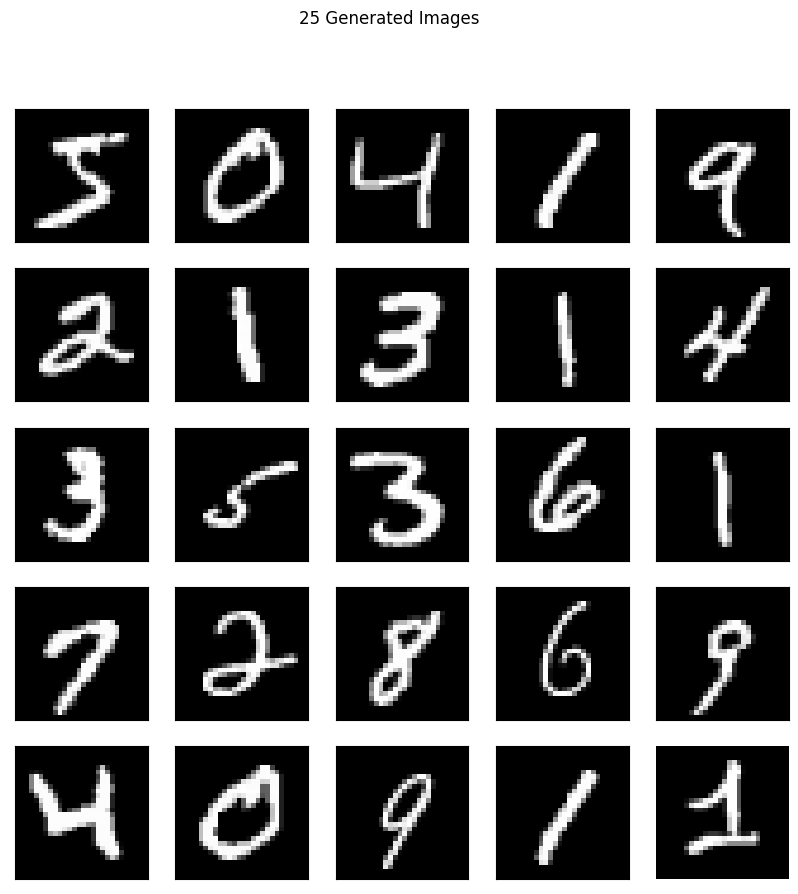

In [51]:
batch_size = 8

training_data = torchvision.datasets.MNIST(
    root="MNIST/",
    train=True,
    download=True,
    transform= torchvision.transforms.ToTensor()

)
data_loader = torch.utils.data.DataLoader(training_data, batch_size)

real = []
for n, (real_samples, _) in enumerate(data_loader):
    if n == n_batches:
        break
    real += [real_samples]
real = torch.cat(real, dim=0)
real = real.permute([0, 2, 3, 1])


fig, axs = plt.subplots(5, 5, figsize=(10,10))
fig.suptitle("25 Generated Images")

for x in range(5):
    for y in range(5):
        index = x*5 + y
        axs[x, y].imshow(real[index], cmap='gray')
        axs[x, y].set_xticks([])
        axs[x, y].set_yticks([])

plt.axis('off')
